<a href="https://colab.research.google.com/github/MatteoGandetto/Corso_ML_con_Python/blob/master/Clustering_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRARIES

In [0]:
# package for scientific computing
import numpy as np

#collection of command style functions that make matplotlib work like MATLAB
import matplotlib.pyplot as plt 

#data analysis and manipulation tool
import pandas as pd 


# LOAD DATASET

feature:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 
 classes:  ['setosa' 'versicolor' 'virginica'] 

dimensione features vector (150, 4)
dimensione labels vector (150,)


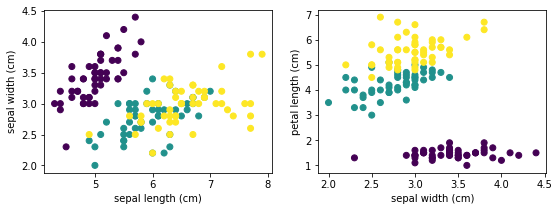

In [2]:
from sklearn import datasets

import matplotlib.pyplot as plt

#load iris dataset
# 3 classes, 4 features,50 samples per features
iris = datasets.load_iris()
#print(iris)

print ('feature: ',iris.feature_names,'\n classes: ',iris.target_names,'\n')
#print(iris.DESCR,'\n')

data = iris.data
labels = iris.target

print('dimensione features vector',data.shape)
print('dimensione labels vector',labels.shape)

fig,ax=plt.subplots(1,2)
fig.set_size_inches(9,3)
for axis,i in zip(ax,range(0,2)):
  axis.scatter(data[:,i],data[:,i+1],c=labels)
  axis.set_xlabel(iris.feature_names[i])
  axis.set_ylabel(iris.feature_names[i+1])

plt.show()




# K-MEANS CLUSTERING

Estimated number of clusters: 2
Estimated number of noise points: 0
Homogeneity: 0.579
Completeness: 1.000
V-measure: 0.734
Adjusted Rand Index: 0.568
Adjusted Mutual Information: 0.732
Silhouette Coefficient: 0.741


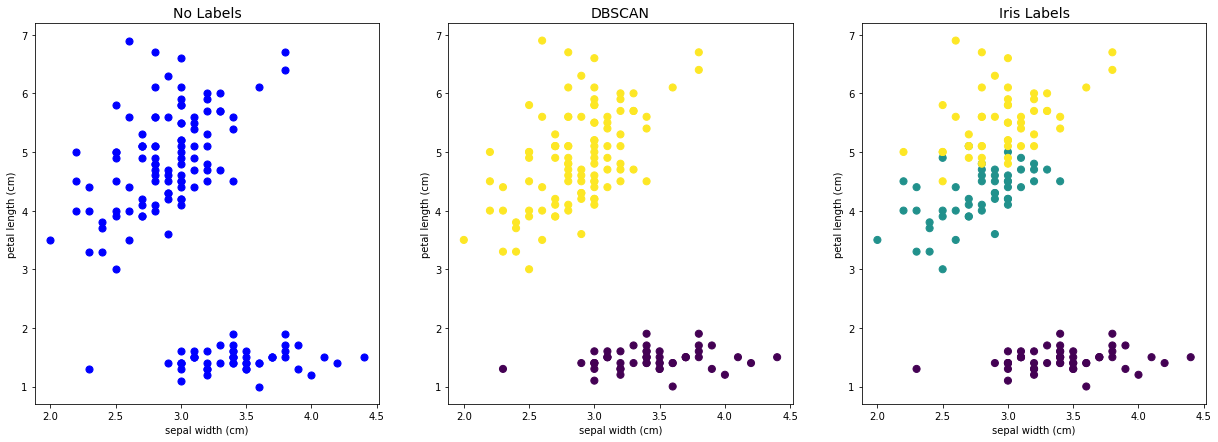

In [22]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline
from sklearn import datasets
from sklearn import metrics

#Iris Dataset
iris = datasets.load_iris()
X = iris.data

X=X[:,1:3]
axes_labes=iris.feature_names
axes_labes=axes_labes[1:3]

#KMeans
db = DBSCAN(eps=0.7, min_samples=3).fit(X)


labels = ('b', db.labels_, iris.target)
title =('No Labels','DBSCAN','Iris Labels',)
fig,ax = plt.subplots(1,len(labels), figsize=(21,7))

for i, label in enumerate(labels):
  ax[i].scatter(X[:, 0], X[:, 1], c=label, s=50)
  ax[i].set_xlabel(axes_labes[0])
  ax[i].set_ylabel(axes_labes[1])
  ax[i].set_title(title[i], fontsize=14)
  
n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
n_noise_ = list(db.labels_).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(iris.target, db.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(iris.target, db.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(iris.target, db.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(iris.target, db.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(iris.target, db.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, db.labels_))
 